**5.- Redes Neuronales y Reconocimiento de Dígitos**

**a.- Averigue que función de activación usa por defecto MLPClassifier(). ¿Cuál es el parámetro que permite modificarla?**

In [0]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
mlp=MLPClassifier()
print("Funcion de activacion por defecto:",mlp.activation)

Funcion de activacion por defecto: relu


**b.- Utilice GridSearchCV para ejecutar el algoritmo MLP con diferentes parámetros y encontrar la mejor parametrización
Pruebe con 2 algoritmos de backpropagation (sgd y adam), 2 funciones de activación (sigmoide, relu), iteraciones (1000, 2000 y 3000), Capas Ocultas (2,3) de diferentes tamaños (10,15,20). Presente resultados.**

In [0]:
digits = load_digits()
X=digits.data
Y=digits.target
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2)

In [13]:
parameters = [{
    'random_state':[0],
    'activation':( 'relu','tanh'),
    'solver':('sgd','adam'), 
    'hidden_layer_sizes':((2,10),(2,15),(2,20),(3,10),(3,15),(3,20)),
    'max_iter':(1000,2000,3000)}]
grid_search = GridSearchCV(estimator = mlp, param_grid = parameters, cv= 5, n_jobs = -1, scoring = 'accuracy')
grid_search.fit(xTrain,yTrain)
pred=grid_search.predict(xTest)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters:  {'activation': 'relu', 'hidden_layer_sizes': (3, 10), 'max_iter': 2000, 'random_state': 0, 'solver': 'adam'}
Best Scoring: 0.84


Original class:    [1 4 5 1 8 5 8 2 7 1 4 6 7 0 3 2 0 2 0 7 2 8 5 8 9 8 6 8 3 9 2 9 8 4 2 6 2
 0 8 2 5 2 5 2 7 0 0 7 0 5 8 1 2 7 4 4 2 1 1 6 7 3 1 9 2 5 2 8 2 5 4 6 9 7
 6 8 5 1 1 3 3 4 8 8 4 7 2 0 4 5 2 1 0 0 9 4 3 5 5 4 1 1 1 9 4 7 5 3 8 6 5
 5 5 5 9 8 2 1 9 3 5 9 6 9 7 3 5 1 9 8 8 8 8 1 0 4 5 5 2 6 2 2 2 8 1 0 3 2
 1 6 6 4 4 9 5 8 1 8 1 4 5 1 3 8 4 2 0 3 9 9 6 3 5 3 2 4 0 4 6 5 6 7 0 0 7
 4 8 1 1 5 4 0 6 7 3 3 6 3 4 1 1 9 2 6 1 6 7 0 2 8 0 2 7 1 1 9 6 7 4 5 4 3
 0 6 5 4 4 9 1 6 1 0 1 7 3 8 7 3 6 9 5 1 0 1 6 5 8 0 9 4 2 3 1 1 2 7 6 6 8
 4 3 9 8 5 5 0 6 8 9 8 4 4 9 5 6 1 7 3 8 4 1 5 1 7 2 5 5 3 2 3 1 9 6 0 8 1
 8 3 4 5 4 4 0 9 7 8 3 8 0 6 4 6 0 3 9 2 3 9 4 0 7 0 3 5 3 1 2 1 2 2 6 8 8
 4 7 9 8 4 2 7 6 5 7 5 4 1 1 7 3 8 3 6 6 0 9 3 2 8 3 9]
Predicted class:   [1 4 5 8 8 5 8 2 7 1 4 6 7 0 3 2 0 2 0 7 3 8 5 8 9 8 6 8 3 8 2 9 8 4 2 6 2
 0 6 2 5

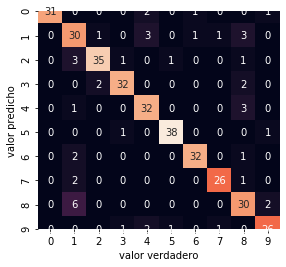

In [16]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Scoring: {:.2f}".format(grid_search.best_score_))
print()
print("\nOriginal class:   ",yTest)
print("Predicted class:  ",pred)
print("Training accuracy: {:.2f}".format(grid_search.score(xTrain,yTrain)))
print("Test accuracy: {:.2f}".format(grid_search.score(xTest,yTest)))
mat = confusion_matrix(yTest, pred)
sns.heatmap(mat.T, square=True, annot=True, cbar=False)
plt.xlabel('valor verdadero')
plt.ylabel('valor predicho')
print("\n\nClassification Report")
print(classification_report(yTest,pred))